# Clustering KNN

In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("players_22.csv")

/private/var/mobile/Containers/Data/Application/6886C219-CE39-4A3F-BF34-486B937A2F19/tmp/ipykernel_3066/2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Pseudocode

## High level

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [10]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [11]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [12]:
centroids = random_centroids(data, 5)

/private/var/mobile/Containers/Data/Application/6886C219-CE39-4A3F-BF34-486B937A2F19/tmp/ipykernel_3066/1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [13]:
centroids

,0,1,2,3,4
overall,4.695652,7.086957,5.782609,6.217391,7.086957
potential,6.652174,7.739130,6.217391,2.956522,4.695652
wage_eur,1.042918,1.004292,1.001431,1.071531,1.128755
value_eur,1.015001,1.047219,1.195421,1.020156,1.040775
age,5.814815,2.851852,3.222222,4.703704,1.740741


In [14]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [15]:
labels = get_labels(data, centroids)

In [16]:
labels.value_counts()

2    9308
0    5802
1    2124
3    1931
Name: count, dtype: int64

In [17]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [19]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

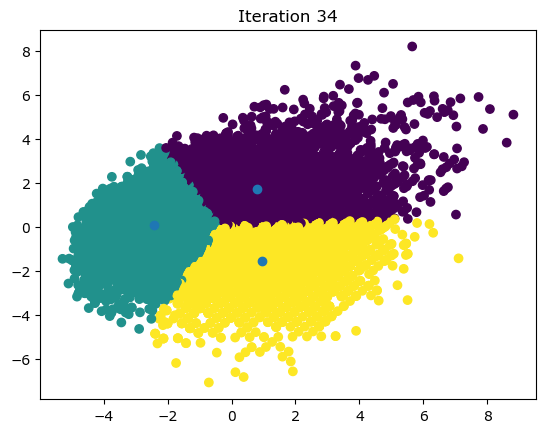

In [20]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [21]:
centroids

,0,1,2
overall,6.324628,3.436536,5.200636
potential,7.100439,5.357557,4.894208
wage_eur,1.456630,1.031374,1.130961
value_eur,1.311183,1.029343,1.049892
age,3.874397,2.674807,5.963956


In [22]:
labels.value_counts()

2    7188
1    6162
0    5815
Name: count, dtype: int64

In [23]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13267,K. Nagera,63,80,8000.0,1300000.0,19
13351,Llabrés,63,81,3000.0,1200000.0,19
14026,M. Azeez,62,83,4000.0,1300000.0,18
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(3)
kmeans.fit(data)

/private/var/containers/Bundle/Application/BDB2F03A-48CB-4984-82CA-190D8BC5581E/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [26]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,3.873971,6.798739,5.230949
potential,5.665009,7.247227,4.902857
wage_eur,1.043807,1.725143,1.126631
value_eur,1.039275,1.457660,1.044868
age,2.896812,4.466826,6.117672


(500, 2)
3


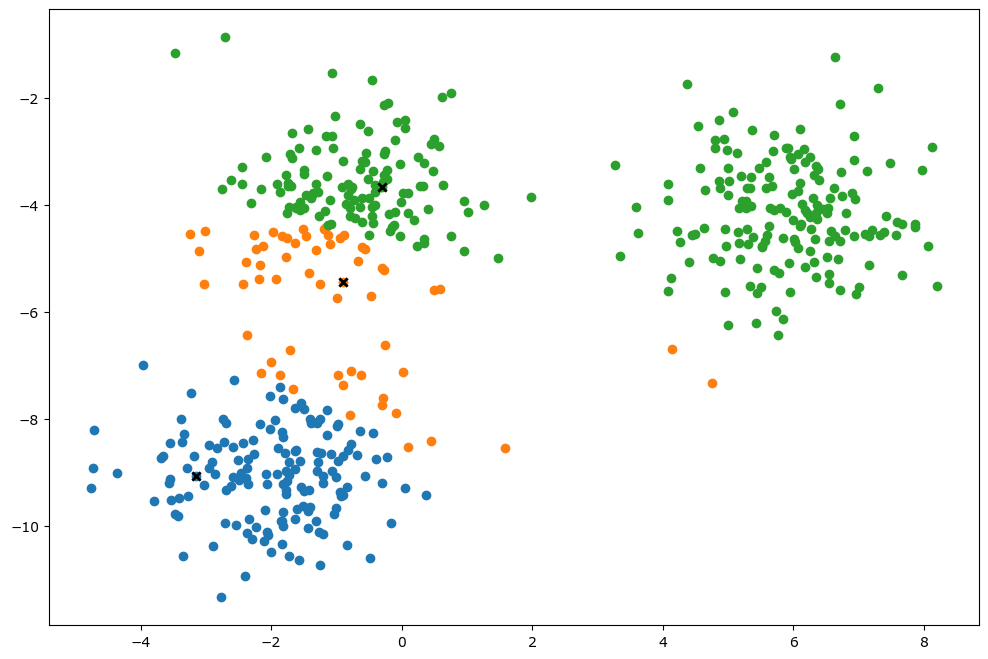

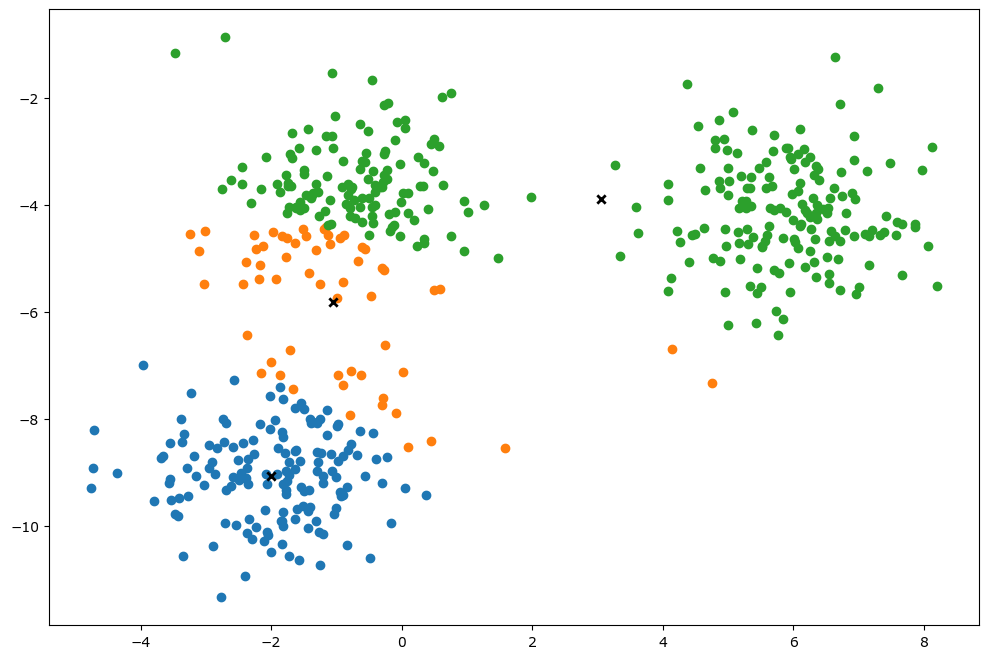

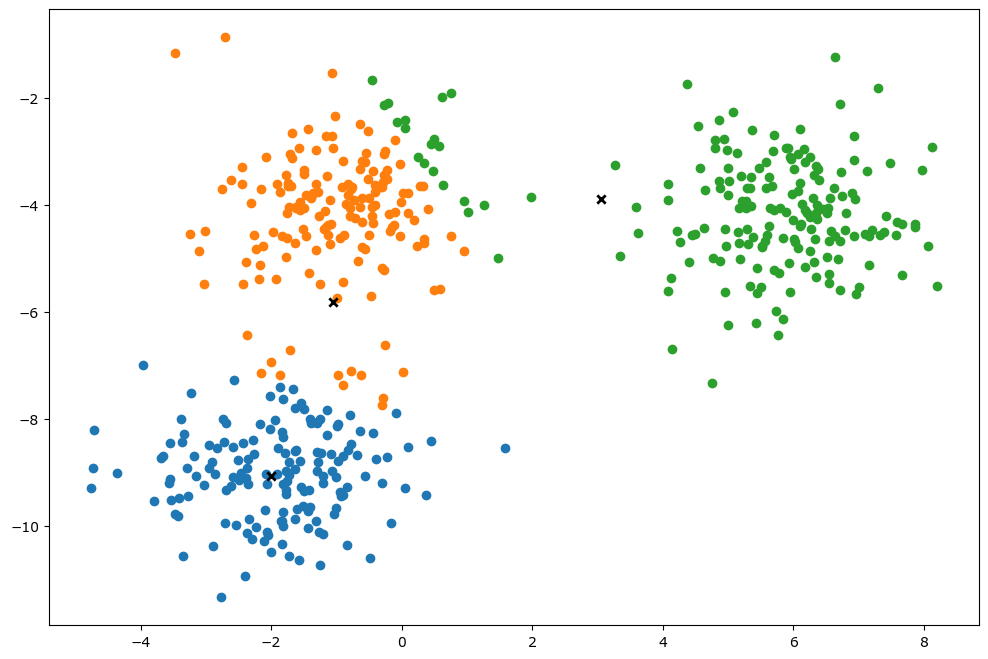

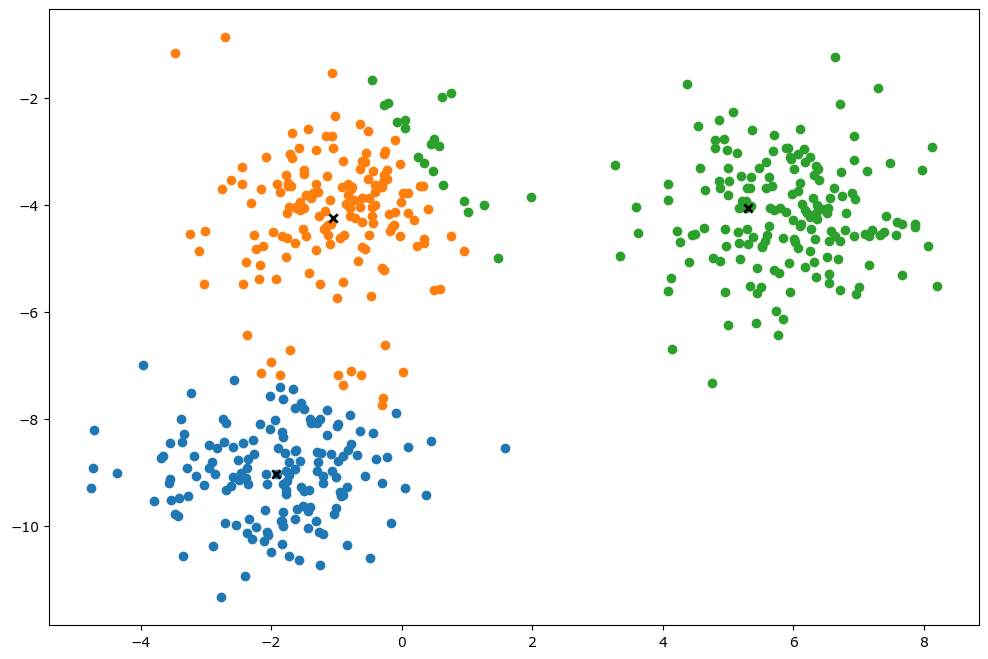

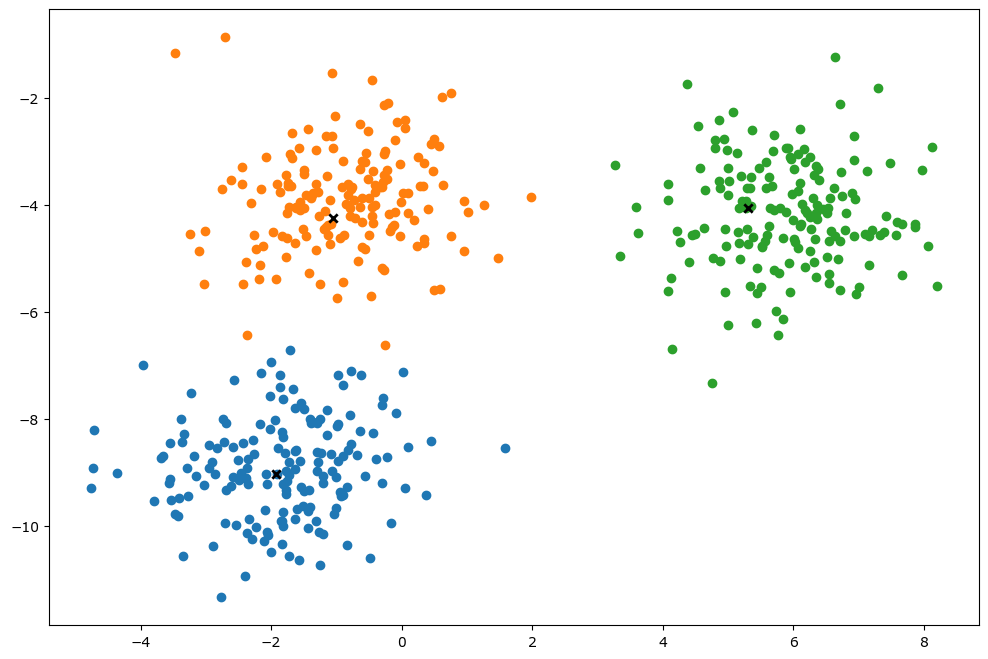

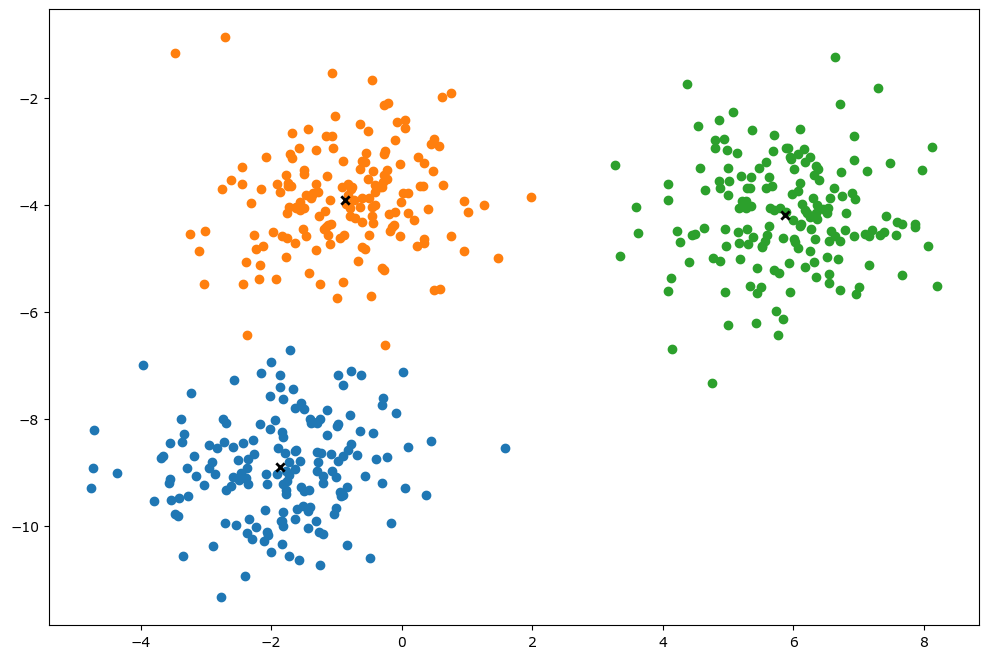

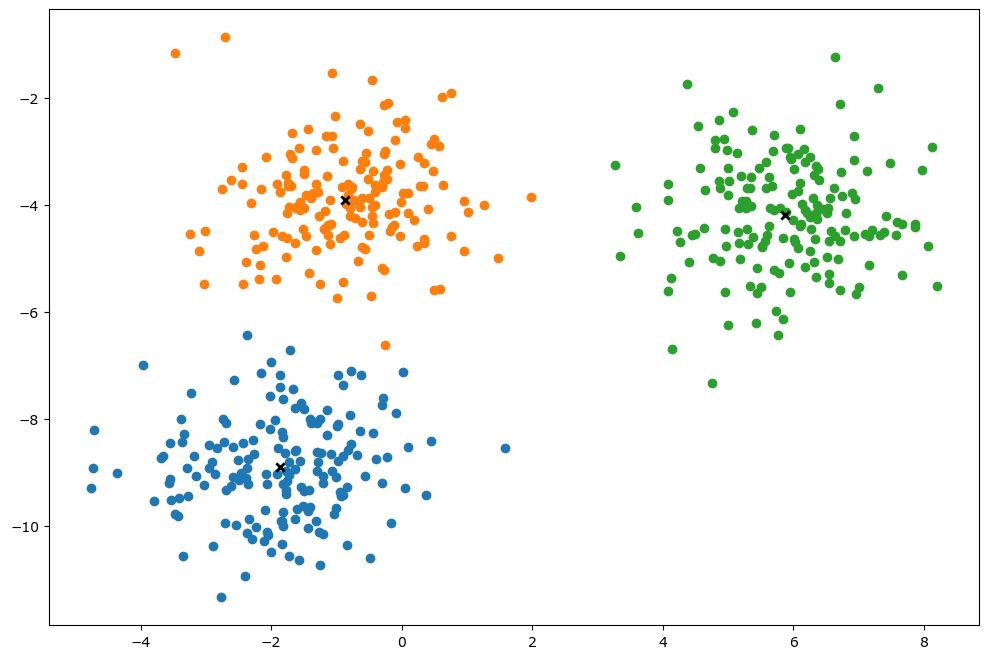

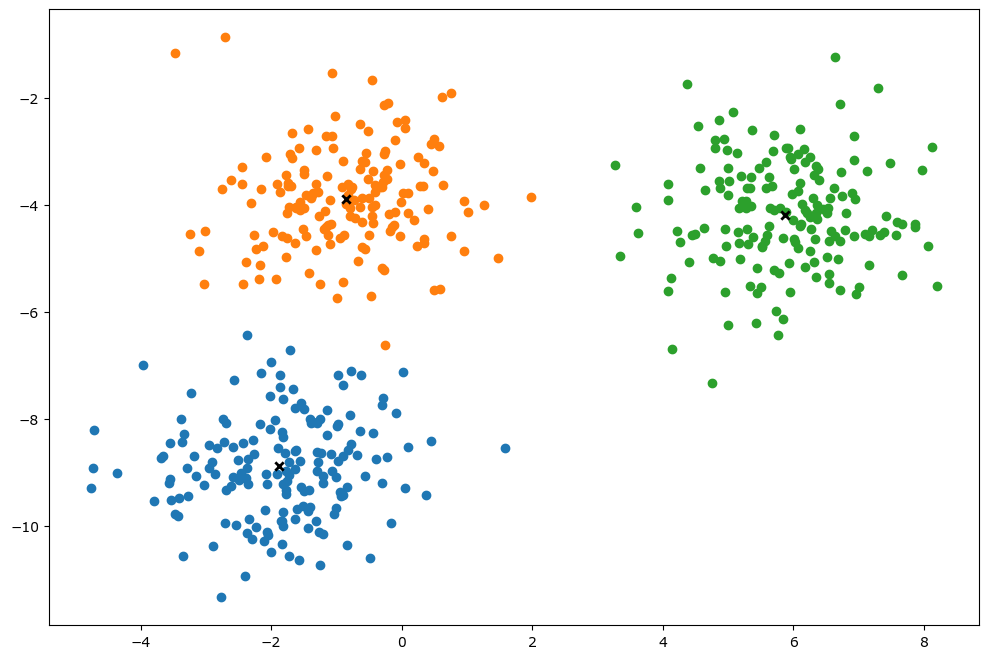

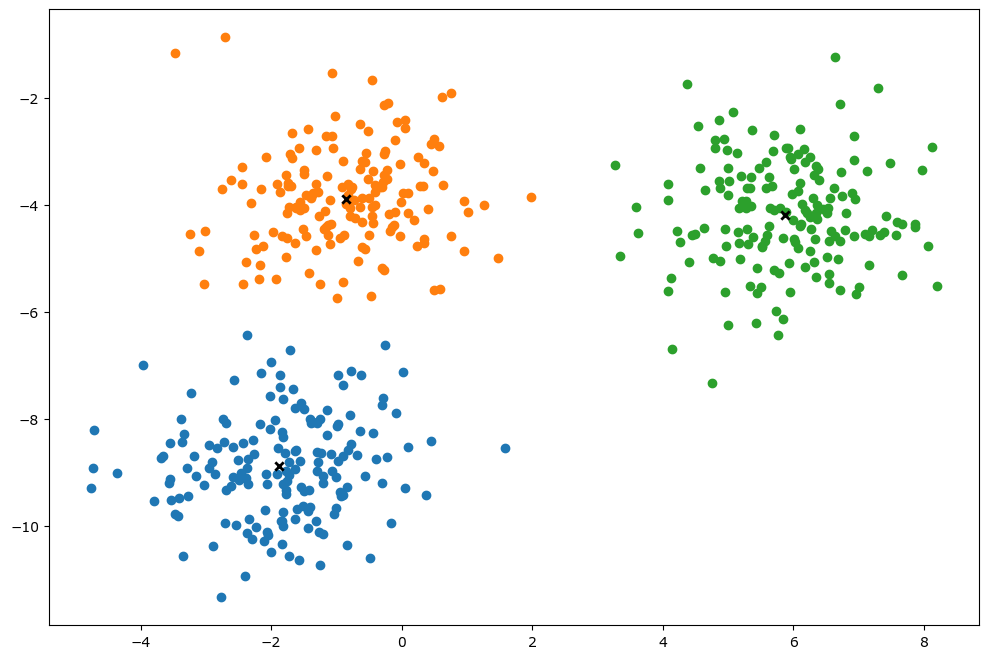

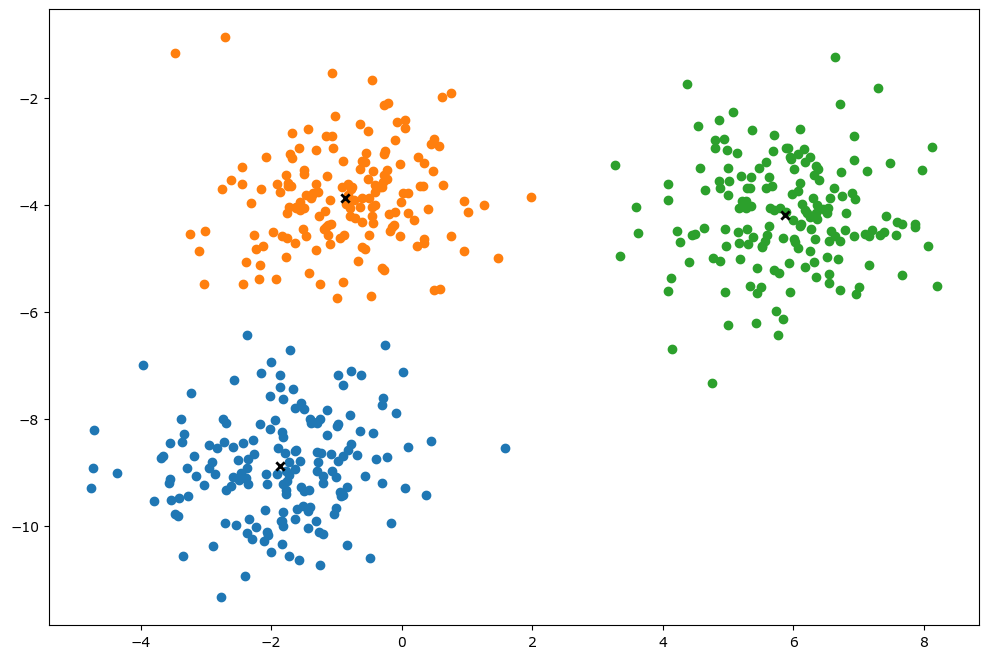

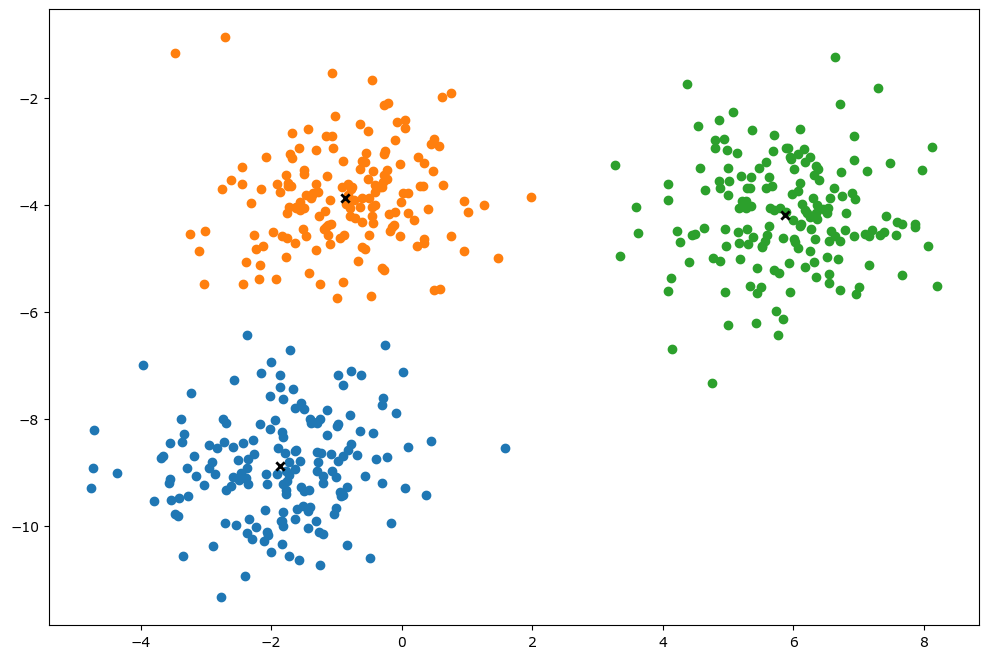

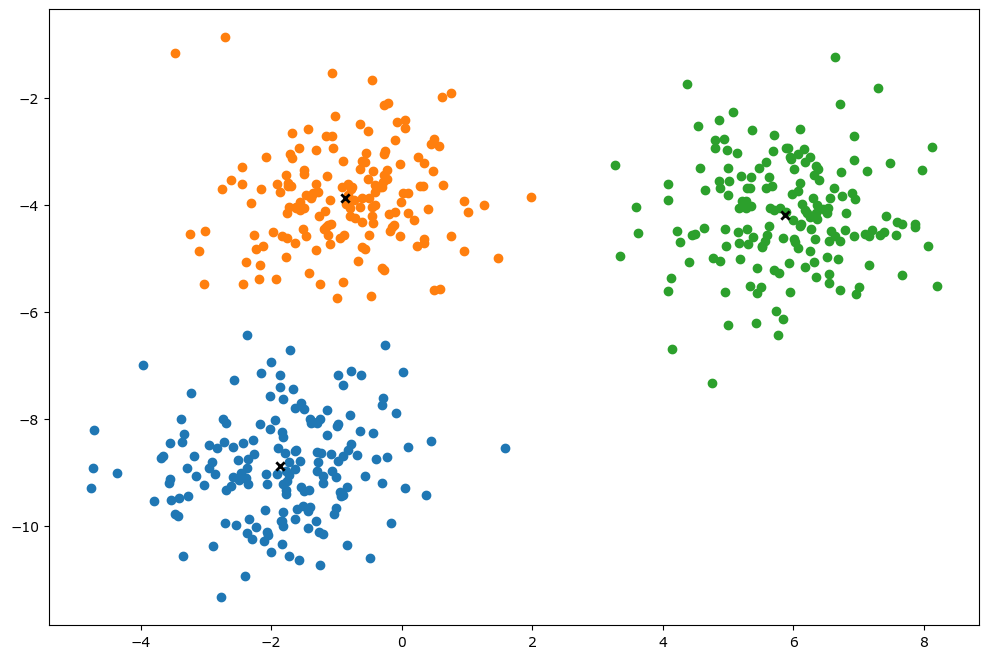

In [27]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


# Testing
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )
    print(X.shape)

    clusters = len(np.unique(y))
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()


In [28]:
from collections import Counter

import numpy as np


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


if __name__ == "__main__":
    # Imports
    from matplotlib.colors import ListedColormap
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    iris = datasets.load_iris()
    X, y = iris.data, iris.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    k = 3
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print("KNN classification accuracy", accuracy(y_test, predictions))


KNN classification accuracy 1.0


blue


/private/var/mobile/Containers/Data/Application/6886C219-CE39-4A3F-BF34-486B937A2F19/tmp/ipykernel_3066/1022396484.py:44: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, color='#000000')


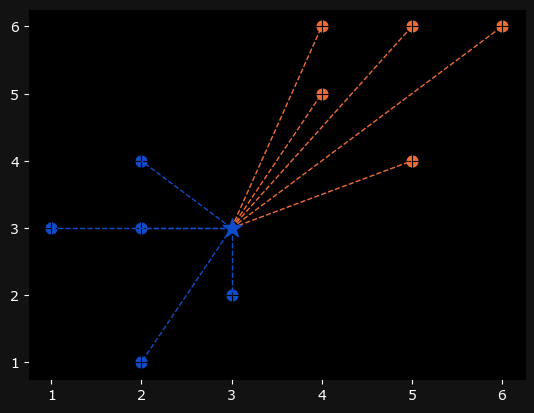

blue


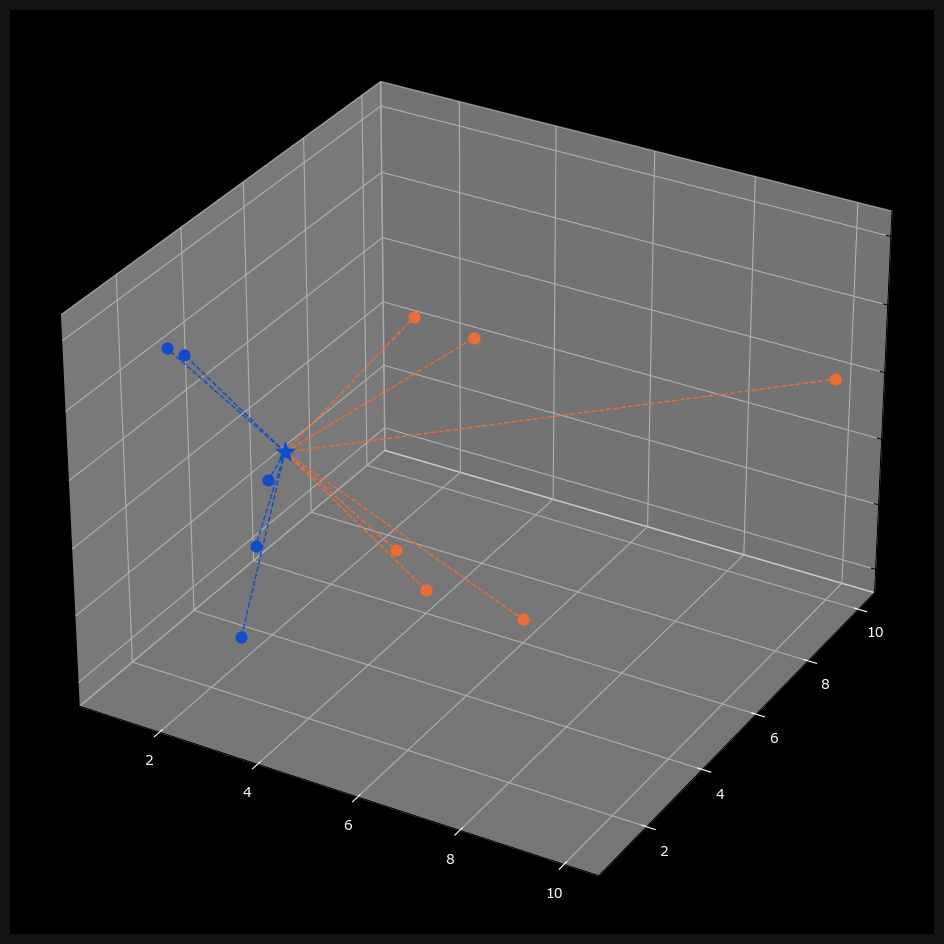

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

points = {'blue': [[2,4], [1,3], [2,3], [3,2], [2,1]],
          'orange': [[5,6], [4,5], [4,6], [6,6], [5,4]]}

new_point = [3,3]


def euclidean_distance(p, q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))


class KNearestNeighbors:

    def __init__(self, k=3):
        self.k = k
        self.points = None

    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distances = []

        for category in self.points:
            for point in self.points[category]:
                distance = euclidean_distance(point, new_point)
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result


clf = KNearestNeighbors(k=3)
clf.fit(points)
print(clf.predict(new_point))

# Visualize KNN Distances

ax = plt.subplot()
ax.grid(False, color='#000000')

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for point in points['blue']:
    ax.scatter(point[0], point[1], color='#104DCA', s=60)

for point in points['orange']:
    ax.scatter(point[0], point[1], color='#EF6C35', s=60)

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#104DCA', linestyle='--', linewidth=1)

for point in points['orange']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#EF6C35', linestyle='--', linewidth=1)

plt.show()

# 3D Example

points = {'blue': [[2, 4, 3], [1, 3, 5], [2, 3, 1], [3, 2, 3], [2, 1, 6]],
          'orange': [[5, 6, 5], [4, 5, 2], [4, 6, 1], [6, 6, 1], [5, 4, 6], [10, 10, 4]]}

new_point = [3, 3, 4]

clf = KNearestNeighbors(k=3)
clf.fit(points)
print(clf.predict(new_point))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.grid(True, color='#323232')

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for point in points['blue']:
    ax.scatter(point[0], point[1], point[2], color='#104DCA', s=60)

for point in points['orange']:
    ax.scatter(point[0], point[1], point[2], color='#EF6C35', s=60)

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], new_point[2], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#104DCA', linestyle='--', linewidth=1)

for point in points['orange']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#EF6C35', linestyle='--', linewidth=1)

plt.show()



